Hola **Brayan**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

La empresa CallMeMaybe la cual provee un servicio de telefonia virtual busca desarrollar una función que brinde información sobre los operadores ineficaces los cuales tienen las siguientes características
- Gran cantidad de llamadas entrantes perdidas (internas y externas)
- tiempo de espera prolongado para las llamadas entrantes
- Numero reducido de llamadas salientes

Nuestro objetivo es encontrar estos operadores para que la generencia pueda realizar los cambios pertinentes para mejorar el servicio

Acceso a Dashboard: https://public.tableau.com/views/ProyectofinalTelecomunicaciones/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Acceso a informe:https://drive.google.com/file/d/12BRzmhNHeB27ZPTrpKFGMbHxC3vFGIBj/view?usp=sharing

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la presentación y el dashboard creado, esto deja ver claramente la combinación de habilidades que adquiriste a lo largo de tu formación cómo Data Analyst! Sin embargo, hay algunas gráficas en la presentación que no son tan claras, te dejaré los comentarios para sus cambios en el ejercicio donde las generas
</div>

## Carga de datos

In [1]:
import datetime as dt
import math as mth

import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_telecom = pd.read_csv('/datasets/telecom_dataset_us.csv')
df_telecom_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

## Preprocesamiento

### Telecom

In [3]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
print(df_telecom.head())

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  


In [5]:
print(df_telecom.isna().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [6]:
print(df_telecom['operator_id'].sum())

41913190960.0


In [7]:
print(df_telecom['operator_id'].isna().sum())

8172


In [8]:
print(df_telecom[df_telecom['operator_id'].isna()])

       user_id                       date direction internal  operator_id  \
0       166377  2019-08-04 00:00:00+03:00        in    False          NaN   
7       166377  2019-08-05 00:00:00+03:00        in    False          NaN   
9       166377  2019-08-06 00:00:00+03:00        in    False          NaN   
17      166377  2019-08-07 00:00:00+03:00        in    False          NaN   
27      166377  2019-08-12 00:00:00+03:00        in    False          NaN   
...        ...                        ...       ...      ...          ...   
53876   168601  2019-11-27 00:00:00+03:00        in    False          NaN   
53880   168601  2019-11-28 00:00:00+03:00        in    False          NaN   
53889   168603  2019-11-28 00:00:00+03:00        in    False          NaN   
53893   168606  2019-11-08 00:00:00+03:00        in    False          NaN   
53901   168606  2019-11-19 00:00:00+03:00        in    False          NaN   

       is_missed_call  calls_count  call_duration  total_call_duration  
0 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de datos y la exploración inicial!
</div>

In [9]:
df_telecom['date'] = pd.to_datetime(df_telecom['date'])
df_telecom['date'] = df_telecom['date'].dt.normalize()
df_telecom.fillna(0,inplace=True)
df_telecom['operator_id'] = df_telecom['operator_id'].astype(int)
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53902 non-null  object                               
 4   operator_id          53902 non-null  int64                                
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

In [10]:
print(df_telecom.duplicated().sum())

4900


In [11]:
print(df_telecom[df_telecom.duplicated()])

       user_id                      date direction internal  operator_id  \
8       166377 2019-08-05 00:00:00+03:00       out    False       880020   
28      166377 2019-08-12 00:00:00+03:00        in    False            0   
44      166377 2019-08-14 00:00:00+03:00       out    False       880026   
45      166377 2019-08-14 00:00:00+03:00        in    False            0   
51      166377 2019-08-15 00:00:00+03:00       out    False       880026   
...        ...                       ...       ...      ...          ...   
53869   168601 2019-11-25 00:00:00+03:00        in    False       952914   
53874   168601 2019-11-26 00:00:00+03:00        in    False       952914   
53875   168601 2019-11-26 00:00:00+03:00        in    False            0   
53885   168603 2019-11-20 00:00:00+03:00       out    False       959118   
53900   168606 2019-11-15 00:00:00+03:00       out     True       957922   

       is_missed_call  calls_count  call_duration  total_call_duration  
8             

In [12]:
df_telecom.drop_duplicates(inplace=True)
df_telecom = df_telecom[~(df_telecom['operator_id']==0)]
df_telecom.reset_index(drop=True, inplace=True)

In [13]:
print(df_telecom)

       user_id                      date direction internal  operator_id  \
0       166377 2019-08-05 00:00:00+03:00       out     True       880022   
1       166377 2019-08-05 00:00:00+03:00       out     True       880020   
2       166377 2019-08-05 00:00:00+03:00       out     True       880020   
3       166377 2019-08-05 00:00:00+03:00       out    False       880022   
4       166377 2019-08-05 00:00:00+03:00       out    False       880020   
...        ...                       ...       ...      ...          ...   
41541   168606 2019-11-09 00:00:00+03:00       out    False       957922   
41542   168606 2019-11-10 00:00:00+03:00       out     True       957922   
41543   168606 2019-11-10 00:00:00+03:00       out     True       957922   
41544   168606 2019-11-11 00:00:00+03:00       out     True       957922   
41545   168606 2019-11-15 00:00:00+03:00       out     True       957922   

       is_missed_call  calls_count  call_duration  total_call_duration  
0             

In [14]:
print(df_telecom.duplicated().sum())

0


-El dataframe df_telecom cuenta con 9 columnas todas non-null y cuenta con 53902

-Se encontraron datos faltantes en la columna internal y operator_id, se decidio no cambiar internal ya que es un balor boolean(true,false) y que son muy pocos valores para impactar el analisis y operator_id ya que no se puede asignar un id de operador random se dejo en 0 los faltantes y se transformo a tipo int ya que este estaba como float pero no contaba con ningun digito despues del punto decimal

-Se decidio dejar de lado los registros que no contaban con un operador registrados ya que el objetivo es verificar la eficiencia de estos y al no estar el identificador de esto no se podria.

-El campo date se cambio a tipo date para un mejor analisis si posteriormente se necesita ya que este estaba como tipo object

-Se encontraron con 4900 duplicados que se procedieron a eliminar



###  Telecom Clients

In [15]:
df_telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [16]:
print(df_telecom_clients.head(5))

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16


In [17]:
df_telecom_clients['date_start'] =pd.to_datetime(df_telecom_clients['date_start'] )
df_telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [18]:
print(df_telecom_clients.isna().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [19]:
print(df_telecom_clients.duplicated().sum())

0


-La df_telecom_clients cuenta con 3 columnas todas non-null y con 732 regitros

-No se encontraron datos duplicados

-No se encontraron datos faltantes

-Se cambio el tipo de dato de date_start ya que estaba como object ahora tipo date para facilitar el analisis posterior si es necesario

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien revisados los datos previo al análisis!
</div>

## Analisis exploratorio

In [20]:
#Crear tiempo de espera
df_telecom['waiting_t'] = df_telecom['total_call_duration'] - df_telecom['call_duration']

print(df_telecom)

       user_id                      date direction internal  operator_id  \
0       166377 2019-08-05 00:00:00+03:00       out     True       880022   
1       166377 2019-08-05 00:00:00+03:00       out     True       880020   
2       166377 2019-08-05 00:00:00+03:00       out     True       880020   
3       166377 2019-08-05 00:00:00+03:00       out    False       880022   
4       166377 2019-08-05 00:00:00+03:00       out    False       880020   
...        ...                       ...       ...      ...          ...   
41541   168606 2019-11-09 00:00:00+03:00       out    False       957922   
41542   168606 2019-11-10 00:00:00+03:00       out     True       957922   
41543   168606 2019-11-10 00:00:00+03:00       out     True       957922   
41544   168606 2019-11-11 00:00:00+03:00       out     True       957922   
41545   168606 2019-11-15 00:00:00+03:00       out     True       957922   

       is_missed_call  calls_count  call_duration  total_call_duration  \
0            

### Correlacion de datos

In [21]:
print(df_telecom.corr())

                      user_id  operator_id  is_missed_call  calls_count  \
user_id              1.000000     0.857676        0.017593     0.024559   
operator_id          0.857676     1.000000        0.008465     0.001606   
is_missed_call       0.017593     0.008465        1.000000     0.028798   
calls_count          0.024559     0.001606        0.028798     1.000000   
call_duration       -0.009683    -0.030892       -0.177885     0.592286   
total_call_duration -0.004940    -0.028882       -0.131034     0.715286   
waiting_t            0.013367    -0.010790        0.081522     0.864604   

                     call_duration  total_call_duration  waiting_t  
user_id                  -0.009683            -0.004940   0.013367  
operator_id              -0.030892            -0.028882  -0.010790  
is_missed_call           -0.177885            -0.131034   0.081522  
calls_count               0.592286             0.715286   0.864604  
call_duration             1.000000             0.97788

-Podemos notar en la matriz de correlacion los factores que tienen una fuerte correlacion como lo son user_id y operator_id lo que indica que estos tienden a tener un incremento juntos si se evaluan

-Por otro lado los factores negativos como is_missed_call y call_duration no indica que si algun de los sube el otro bajara 

-Esta matriz nos ayuda para ver que datos podemos medir en conjunto.

### Porcentaje de llamadas perdidas por operador

In [22]:
print(df_telecom['is_missed_call'].value_counts())
print(df_telecom['calls_count'].sum())

False    27436
True     14110
Name: is_missed_call, dtype: int64
702145


In [23]:
df_missed = df_telecom[df_telecom['is_missed_call']==True].groupby('operator_id')['calls_count'].sum() / df_telecom.groupby('operator_id')['calls_count'].sum()

print(df_missed)

operator_id
879896    0.269892
879898    0.322713
880020    0.488889
880022    0.532995
880026    0.290323
            ...   
972410    0.480519
972412    0.409836
972460    0.549020
973120    0.666667
973286         NaN
Name: calls_count, Length: 1092, dtype: float64


In [24]:
filter_missed = df_missed[df_missed>=0.05] 
print(filter_missed)

operator_id
879896    0.269892
879898    0.322713
880020    0.488889
880022    0.532995
880026    0.290323
            ...   
972408    0.333333
972410    0.480519
972412    0.409836
972460    0.549020
973120    0.666667
Name: calls_count, Length: 830, dtype: float64


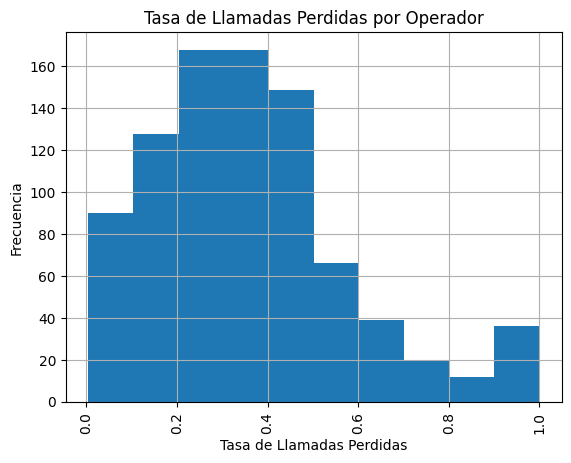

In [25]:
df_missed.hist()
plt.title('Tasa de Llamadas Perdidas por Operador')
plt.xlabel('Tasa de Llamadas Perdidas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los gráficos de dispersión se usan generalmente para visualizar la correlación entre dos variables, pero en este caso estás mostrando el ID del operador que no tendrá correlación ese número con la tasa de llamadas perdidas. Deberías utilizar un gráfico de barras procurando aplicar los filtros necesarios para no generar demasiadas barras que no aporten valor en la gráfica. Además, debes especificar que columnas deben ir en X y en Y para evitar errores al momento de generar la gráfica
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cambio! Esta gráfica es mucho más clara que la anterior
</div>

In [26]:
print(df_missed[ df_missed > 0.05])

operator_id
879896    0.269892
879898    0.322713
880020    0.488889
880022    0.532995
880026    0.290323
            ...   
972408    0.333333
972410    0.480519
972412    0.409836
972460    0.549020
973120    0.666667
Name: calls_count, Length: 830, dtype: float64


-Como podemos ver de los operadores la gran mayoria tiene entre un 20% y 40% de llamadas perdidas es un gran porcentaje, por lo que verificar los sistemas por alguna fallo, gestionar correctamente la cantidad de llamadas en comparacion con la cantidad de operadores serian un buen punto de partida para encontrar los problemas de esta alta tasa de llamadas perdidas


### Promedio de duracion de llamada y duracion total

In [27]:
df_call_duration = df_telecom.groupby('operator_id').agg({'call_duration':'mean','total_call_duration':'mean'}).reset_index()

print(df_call_duration)

      operator_id  call_duration  total_call_duration
0          879896     545.829060           650.743590
1          879898    1133.881057          1591.577093
2          880020     112.250000           126.250000
3          880022     216.385714           270.357143
4          880026     842.450549           964.428571
...           ...            ...                  ...
1087       972410     944.250000          1318.750000
1088       972412     699.600000           909.600000
1089       972460     174.000000           262.571429
1090       973120       2.500000            12.500000
1091       973286      17.000000           105.000000

[1092 rows x 3 columns]


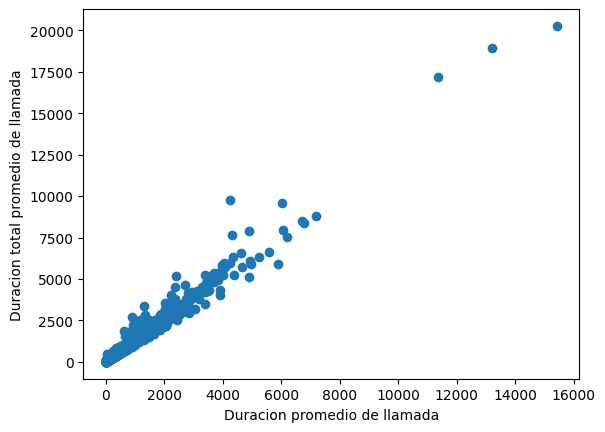

In [28]:
plt.scatter(df_call_duration['call_duration'],df_call_duration['total_call_duration'])
plt.xlabel('Duracion promedio de llamada')
plt.ylabel('Duracion total promedio de llamada')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los gráficos de barras son ideales para la comparación, pero aquí no se puede visualizar las diferencias entre operadores, además en este dataset no tienes el ID de operadores por lo que la descripción del eje X es errónea
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, ahora estás aplicando la gráfica de manera adecuada
</div>

In [29]:
print(df_call_duration[df_call_duration['call_duration']>480])

      operator_id  call_duration  total_call_duration
0          879896     545.829060           650.743590
1          879898    1133.881057          1591.577093
4          880026     842.450549           964.428571
5          880028     726.752475           936.930693
11         882684    1407.298701          1535.779221
...           ...            ...                  ...
1070       969294     758.800000           845.200000
1073       969600    3911.500000          4041.500000
1084       971102    2653.000000          2991.000000
1087       972410     944.250000          1318.750000
1088       972412     699.600000           909.600000

[358 rows x 3 columns]


-Por lo que podemos observar si un operador tiene una baja duracion de la llamada tiende a tener una duracion total baja por lo que con esto podemos identificar a operadores con tiempos extremos de duracion de llamada y los que tienen tiempo de espera muy largos por lo que permitar ver el flujo que estos estan haciendo, permitien identificar problemas de software o una mala gestion en la atencion

### Porcentaje de llamadas internas

In [30]:
df_internal_calls = df_telecom[df_telecom['internal']==True].groupby('operator_id')['calls_count'].sum() / df_telecom.groupby('operator_id')['calls_count'].sum()

print(df_internal_calls)

operator_id
879896    0.060215
879898    0.002461
880020    0.088889
880022    0.076142
880026    0.008961
            ...   
972410         NaN
972412         NaN
972460    0.058824
973120         NaN
973286         NaN
Name: calls_count, Length: 1092, dtype: float64


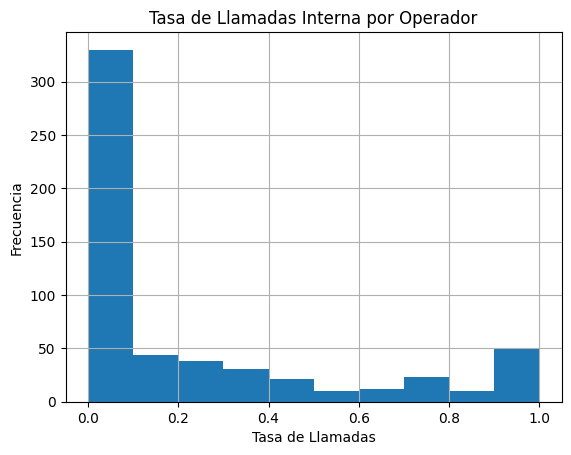

In [31]:
df_internal_calls.hist()
plt.title('Tasa de Llamadas Interna por Operador')
plt.xlabel('Tasa de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Esta gráfica tiene el mismo problema que la anterior de tipo scatter
</div>

In [32]:
print(df_internal_calls[df_internal_calls > 0.2])

operator_id
881278    0.400000
882478    0.750000
884402    0.750000
884406    1.000000
884408    0.333333
            ...   
969284    1.000000
969286    0.250000
969380    0.875000
970244    0.250000
970254    0.250000
Name: calls_count, Length: 194, dtype: float64


-La gran mayoria de los operadores tiene menos de un 20% llamas internas(transferencias a otro operador) por lo cual la mayoria maneja cada una de sus llamadas, los que cuentan con mas de un 20% se tendria que investigar el porque ya que puede ser que estos no esten capacitados o que la llamada no era para gestiones normales.


### Cantidad de llamadas in y out

In [33]:
calls_count_dir2 = df_telecom.groupby('direction')['calls_count'].sum()
print(calls_count_dir2)

direction
in      93802
out    608343
Name: calls_count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

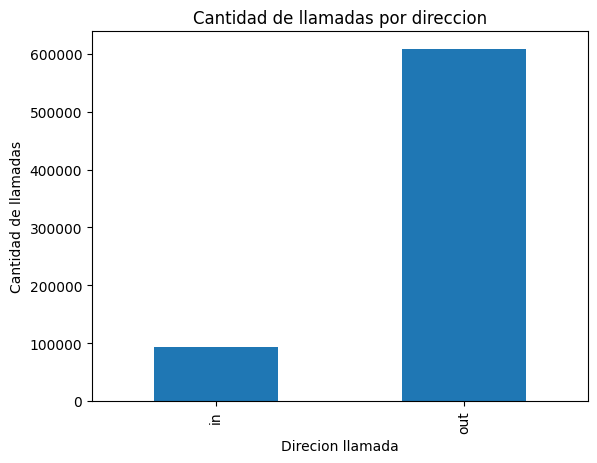

In [34]:
calls_count_dir2.plot(kind='bar')
plt.title('Cantidad de llamadas por direccion')
plt.xlabel('Direcion llamada')
plt.ylabel('Cantidad de llamadas')
plt.show

-Como se puede la tendencia es a un mayor numero de llamadas salientes que entrantes, se tiene que investigar mas por el motivo de estas llamadas ya que pueden ser por una reconexion de una llamada entrante o para completar un servicio que se requeria 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Igual que la gráfica anterior esto no se puede visualizar y no aporta valor a la empresa cuando se quiera revisar la cantidad de llamadas.
</div>

### Tiempo de espera promedio por direccion de llamada

In [35]:
#solo para tener filtro por operador
df_waitin_calls = df_telecom.pivot_table(index='operator_id',columns='direction',values='waiting_t',aggfunc='mean')
print(df_waitin_calls)

direction           in         out
operator_id                       
879896       27.333333  121.885417
879898       29.473684  601.276471
880020        7.714286   17.384615
880022       14.000000   59.129032
880026        7.944444  134.493902
...                ...         ...
972410             NaN  374.500000
972412       25.000000  256.250000
972460        4.000000  102.666667
973120             NaN   10.000000
973286       88.000000         NaN

[1092 rows x 2 columns]


In [36]:
df_waitin_calls2 = df_telecom.groupby('direction')['waiting_t'].mean() 

print(df_waitin_calls2)

direction
in      96.857378
out    406.821227
Name: waiting_t, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

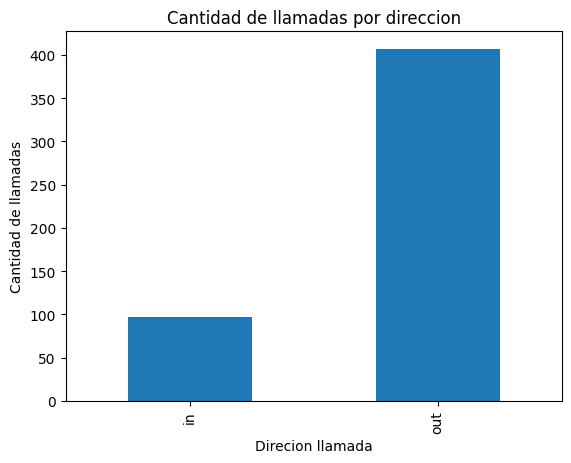

In [37]:
df_waitin_calls2 .plot(kind='bar')
plt.title('Cantidad de llamadas por direccion')
plt.xlabel('Direcion llamada')
plt.ylabel('Cantidad de llamadas')
plt.show

-Como se puede ver los tiempos de espera promedio son mayores en las llamadas salientes por lo que se tiene que verificar el motivo, ya que puede ser por falta de operadores, dar preferencia a las llamadas salientes o problemas con el sistema cuando se trata de realizar una llamada

In [38]:
print(df_waitin_calls[df_waitin_calls['in']>120])

direction            in          out
operator_id                         
882684       190.520000    98.653846
882686       165.750000   342.384615
882688       336.500000   105.857143
882690       322.818182   720.707317
885890       120.276596  9004.377358
...                 ...          ...
962902       134.166667   212.323529
969272       233.375000   169.181818
969294       177.500000    25.666667
970254       121.000000    48.500000
971102       338.000000          NaN

[68 rows x 2 columns]


### Cantidad de llamadas por plan

In [39]:
telecom_merge = df_telecom.merge(df_telecom_clients, on='user_id')

In [40]:
print(telecom_merge['tariff_plan'].value_counts())

C    14837
B    14483
A    12226
Name: tariff_plan, dtype: int64


In [41]:
cnt_tariff = telecom_merge.pivot_table(index='tariff_plan',columns='direction',values='calls_count',aggfunc='sum',fill_value=0)

print(cnt_tariff)

direction       in     out
tariff_plan               
A            31803  348468
B            28210  110501
C            33789  149374


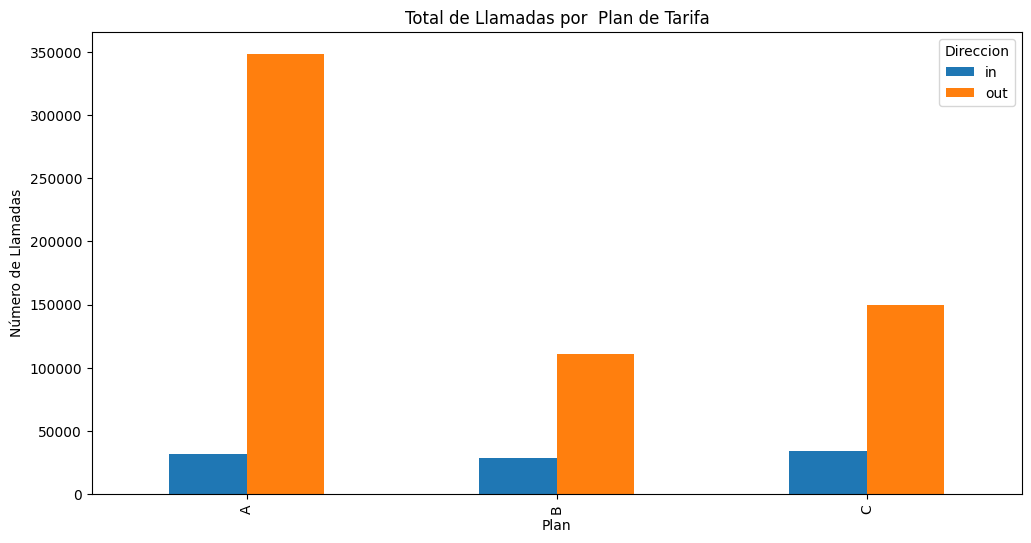

In [42]:
cnt_tariff.plot(kind='bar', figsize=(12, 6))
plt.title('Total de Llamadas por  Plan de Tarifa')
plt.xlabel('Plan')
plt.ylabel('Número de Llamadas')
plt.legend(title='Direccion')
plt.show()

-En cuanto a las direccion de llamadas como se venia observando las llamadas salientes son mayores a la entrantes en todos los planes siendo el plan el A con mayor llamadas salientes, ya que no se especifica el motivo de una llamada saliente que puede ser venta de servicios, para completar alguna gestion, cobranza, etc. se tiene monitorear el porque de esta gran cantidad

-Por su parte el plan es el que cuenta con llamadas entrantes siendo probable el que mas interesados tenga para contratar, de ser el caso seria una buena opcion comparar las caracteristicas de todos los planes para ver el motivo de su preferencia.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Todas las gráficas de barras mostradas no son correctas ya que no tienen claridad en lo que estás mostrando, para generar una gráfica correcta procura especificar que columna tomarás en el eje X y en el eje Y
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cambio de las gráficas, ahora son mucho más claras en cuanto a lo que se intenta comunicar
</div>

### Cantidad de cliente por mes

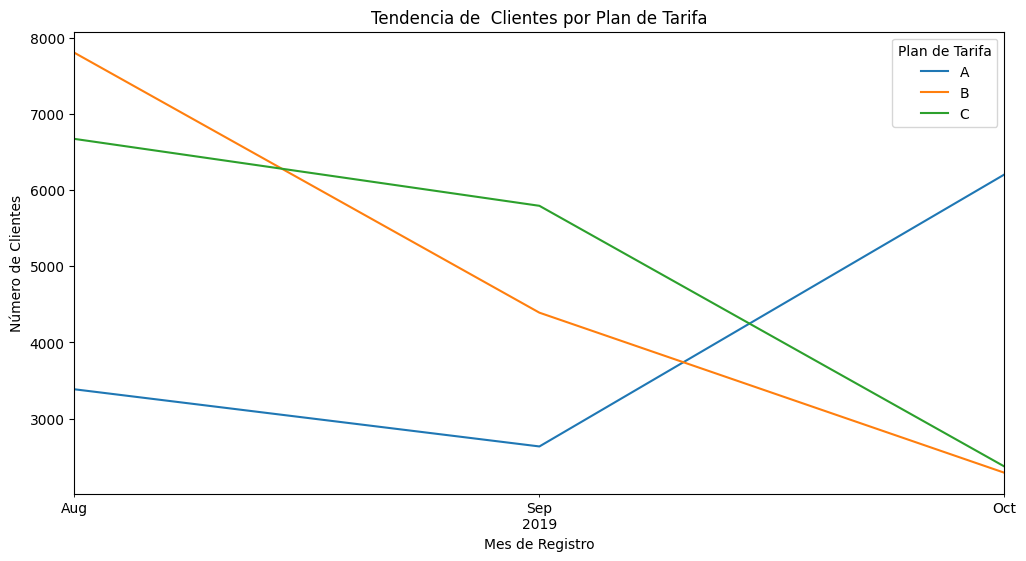

In [43]:
telecom_merge['date_start_month'] = telecom_merge['date_start'].dt.to_period('M')

monthly_registrations = telecom_merge.groupby([telecom_merge['date_start_month'], 'tariff_plan']).size().unstack(fill_value=0)

# Graficar
monthly_registrations.plot(kind='line', figsize=(12, 6))
plt.title('Tendencia de  Clientes por Plan de Tarifa')
plt.xlabel('Mes de Registro')
plt.ylabel('Número de Clientes')
plt.legend(title='Plan de Tarifa')
plt.show()

-Como podemos ver los planes B y C cuenta con mas registros incialmente en el mes de Agosto que el plan A pero los 2 mencionados fueron bajando el numero de registros considerablemente mientra que el plan A conto un repunte

-Debido a lo anterior se tiene que ajustar los planes B y C a los servicios que ofrece el plan A para que estos logren un incremento en los registros

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando en cada mes por cada plan
</div>

## Hipotesis

### Prueba llamadas entrantes y salientes

H0 = Las llamadas entrantes son iguales a las llamadas salientes

H1 = las llamadas entrantes son diferenctes de la llamadas salientes

In [44]:
alpha = 0.05
in_calls = telecom_merge[telecom_merge['direction']=='in'].groupby('operator_id')['calls_count'].sum()
out_calls = telecom_merge[telecom_merge['direction']=='out'].groupby('operator_id')['calls_count'].sum()

#igualar los dataframe para realizar pla prueba
aligned_in_calls, aligned_out_calls = in_calls.align(out_calls, join='inner')
result = st.ttest_rel(aligned_in_calls, aligned_out_calls)

print("Valor p:", result.pvalue)

if result.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

Valor p: 0.0025475348938433476
Rechazamos la hipotesis nula


-Con la prueba se comprobo que si existe una diferencia entre las llamadas entrantes y salientes, por lo que podemos decir que los operadores estan tieniendo un flujo diferente de llamadas entrantes y salientes por lo que se podria identificar operadores que solo esten enfocando en una direccion de llamada.

### Comparacion tiempo de espera

H0: La duración promedio de espera es igual entre llamadas entrantes y salientes.

H1: La duración promedio de espera difiere entre llamadas entrantes y salientes.

In [45]:
# Filtrar llamadas entrantes y salientes, y calcular el tiempo de espera promedio
waiting_in = df_telecom[df_telecom['direction'] == 'in'].groupby('operator_id')['waiting_t'].mean()
waiting_out = df_telecom[df_telecom['direction'] == 'out'].groupby('operator_id')['waiting_t'].mean()



# Prueba t para muestras independientes
result2 = st.ttest_ind(waiting_in, waiting_out)

print("Valor p:", result2.pvalue)

if result2.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

Valor p: 3.9524871311973736e-18
Rechazamos la hipotesis nula


-Con los resultados de la prueba se puede ver que los tiempo de espera son diferentes para llamadas entrantes y salientes, por lo que se podria identficar a operadores que esten demorando mas en unas llamadas(direccion de llamadas) que en otras por falta de preparacion o por que estan recibiendo demasiada llamadas.

### Prueba duracion de llamadas y duracion total de llamada
H0 = La duracion de la llamada es igual a la duracion total de la llamada

H1 = la La duracion de la llamada es diferente a la duracion total de la llamada

In [46]:
test_call = telecom_merge[telecom_merge['call_duration']>0]
test_call_t = telecom_merge[telecom_merge['total_call_duration']>0]
results3 = st.ttest_ind(test_call['call_duration'],test_call_t['total_call_duration'])
print('pvlau{:.18f}'.format(results3.pvalue) )

if results3.pvalue < alpha:
        print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

pvlau0.000014617043999601
Rechazamos la hipotesis nula


-Con la prueba podemos ver que la duracion de las llamadas y el duracion total no son iguales, por lo que los tiempos de espera estarian siendo la diferencia, permitiondo enfocarse en los operadores que cuenten con una diferencia significativa en estos 2 tiempos.

### Duracion de llamada de los planes

H0 = todos lo planes cuentan con las misma duracion de llamada

H1 = Los planes cuentan con diferentes duraciones de llamadas

In [47]:
plan_a = telecom_merge[telecom_merge['tariff_plan']=='A']['call_duration']
plan_b = telecom_merge[telecom_merge['tariff_plan']=='B']['call_duration']
plan_c = telecom_merge[telecom_merge['tariff_plan']=='C']['call_duration']

In [48]:
#test de ANOVO para multiples grupos
results4 = st.f_oneway(plan_a,plan_b,plan_c)
print('p_value:',results4.pvalue)
if results4.pvalue < alpha:
        print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

p_value: 8.476635045377286e-125
Rechazamos la hipotesis nula


-Como podemos ver por la prueba la duracion de las llamadas es diferente para cada plan A, B Y C, por lo cual se tendria que verificar los operadores que tienen un menor tiempo en un plan y en los otros no para verificar que este no lo este realizando aproposito debido a que las llamadas relacionadas a un plan pueden ser mas faciles de solucionar o que las personas relacionadas un plan contraten mas serivicios dejando al operdor con mayores bonos.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la aplicación de las pruebas estadísticas, pero aquí debes aclarar cómo ayudan las mismas a determinar cómo afectan los operadores ineficientes a la empresa cómo se menciona en el objetivo del proyecto
</div>

## Conclusiones y recomendaciones

-Considerando que la tasa de llamadas perdidas normales puede ser entre un 2% a 5%, un 76% de los operadores estaria sobre este umbral por lo que por ejemplo tener mas operadores para probar si este numero disminuye

-El promedio de duracion de llamada por lo general es de 6 minutos y 10 segundos para este caso y tomaremos 8 minutos que es para garantizar la calidad de la llamada, aproximadamente un 33%  de los operadores estarian sobrepasando esto, por lo que estar vigilando por ejemplo los tiempos en silencio o verificar que el operador este haciendo el flujo para una gestion correctamente es esencial para disminuir la duracion de la llamada sin afectar la calidad del servicio

-Dentro de los planes los que sobrepasan el umbral son un 12% para el A, 11% para el plan B y un 10% para el C, por lo que hay que investigar el motivo de esto para los diferentes planes .

-El promedio de tranferiecia considerado bueno o aceptable es entre un 11% y 20%, aproximadamente un 18% de los operadores esta sobre esto por lo que mejorar el conocimiento con respecto a los servicios o mejorar el acceso a la informacion ayudaria a mejorar esta tasa.

-El tiempo promedio en el que el usuario abandona una llamada es de 2 minutos y 36 segundosm, por lo que dejar un tiempo de espera menor o igual a 2 minutos seria aceptable, con esto en mente aproximadamente un 7% de los operadores contemplando las llamadas entrantes contaron con un porcentaje mayor al tiempo definido, para ir mejorando se pordria verificar las colas de llamadas en relacion a la cantidad de operadores o talvez implementar soluciones de auto ayuda para que los usuarios no requieran llamar para cuestiones que puedan solucionar ellos.

-La cantidad de usuario por plan en los 3 meses que se poseen registros fue disminuyendo para los planes B Y C siendo que estos tenian la mayor cantidad de registros inicialmente y el plan A que tenia pocos subio considerablemente al final del ultimo mes, por lo que tomar caracteristicas de este plan como modelo para implementarlo en los otros y aumentar la cantidad usuarios en estos.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el avance de tu proyecto Brayan! Hay algunos puntos que necesitan cambios para que tu proyecto quede mejor presentado, recuerda que si tienes dificultad para resolver o necesitas una guía más detallada de tu proyecto puedes contactar a tu CM que de ser necesario te ayudará con tutorías para que resuelvas tu proyecto. Saludos!
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Brayan!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas una profesional de primera en el mundo laboral.
   
Saludos!
</div>